In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from sympy.abc import theta
%matplotlib inline

consider a linear regression problem of the form
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <msup>
    <mi mathvariant="bold-italic">x</mi>
    <mi>T</mi>
  </msup>
  <mi mathvariant="bold-italic">&#x3B8;</mi>
  <mo>+</mo>
  <mi>&#x3F5;</mi>
  <mstyle>
    <mspace width="0.167em"></mspace>
  </mstyle>
  <mo>,</mo>
  <mstyle>
    <mspace width="1em"></mspace>
  </mstyle>
  <mi>&#x3F5;</mi>
  <mo>&#x223C;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">N</mi>
  </mrow>
  <mo stretchy="false">(</mo>
  <mn>0</mn>
  <mo>,</mo>
  <msup>
    <mi>&#x3C3;</mi>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
</math>

```
| Symbol                                        | Meaning                                                                             |
| :-------------------------------------------- | :---------------------------------------------------------------------------------- |
| ( x )                                         | Input (feature) vector, e.g. ( x = [x_1, x_2, \dots, x_D]^T )                       |
| ( y )                                         | Output (target) value — the number we’re trying to predict                          |
| ( \theta )                                    | Parameter (weight) vector — what the model learns                                   |
| ( x^T \theta )                                | Predicted value (a linear combination of inputs)                                    |
| ( \varepsilon )                               | Random noise, representing things we can’t model exactly                            |
| ( \varepsilon \sim \mathcal{N}(0, \sigma^2) ) | Noise is drawn from a **normal distribution** with mean 0 and variance ( \sigma^2 ) |
```

Where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="bold-italic">x</mi>
  <mo>&#x2208;</mo>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
    <mi>D</mi>
  </msup>
</math> are inputs and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>&#x2208;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="double-struck">R</mi>
  </mrow>
</math> are noisy observations. The parameter vector <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="bold-italic">&#x3B8;</mi>
  <mo>&#x2208;</mo>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
    <mi>D</mi>
  </msup>
</math> parametrizes the function.
we assume we have a training set <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>n</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <mi>N</mi>
</math>. We summarize the sets of training inputs in <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">X</mi>
  </mrow>
  <mo>=</mo>
  <mo fence="false" stretchy="false">{</mo>
  <msub>
    <mi mathvariant="bold-italic">x</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <msub>
    <mi mathvariant="bold-italic">x</mi>
    <mi>N</mi>
  </msub>
  <mo fence="false" stretchy="false">}</mo>
</math> and corresponding training targets <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">Y</mi>
  </mrow>
  <mo>=</mo>
  <mo fence="false" stretchy="false">{</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <msub>
    <mi>y</mi>
    <mi>N</mi>
  </msub>
  <mo fence="false" stretchy="false">}</mo>
</math>, respectively.


Text(0, 0.5, 'y')

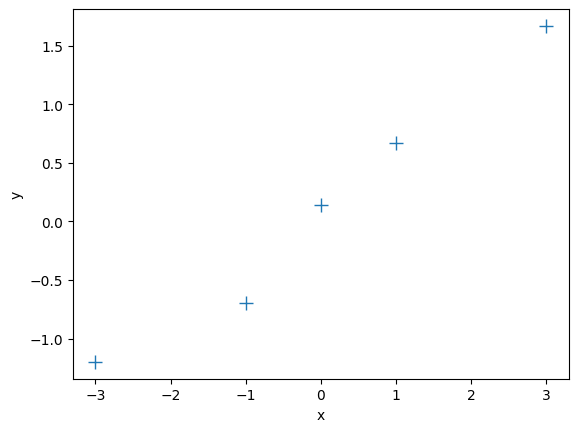

In [5]:
# Define training set
x = np.array([-3,-1,0,1,3]).reshape(-1, 1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1, 1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(x, y, '+', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

### 1) Maximum Likelihood
Maximum of the parameters, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="bold-italic">&#x3B8;</mi>
</math>. in maximum likelihood estimation, we find the parameters <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi mathvariant="bold-italic">&#x3B8;</mi>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <mi data-mjx-auto-op="false">ML</mi>
      </mrow>
    </mrow>
  </msup>
</math> that maximize the likelihood
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>p</mi>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">Y</mi>
  </mrow>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">X</mi>
  </mrow>
  <mo>,</mo>
  <mi mathvariant="bold-italic">&#x3B8;</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munderover>
    <mo data-mjx-texclass="OP">&#x220F;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mi>N</mi>
  </munderover>
  <mi>p</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>n</mi>
  </msub>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <msub>
    <mi mathvariant="bold-italic">x</mi>
    <mi>n</mi>
  </msub>
  <mo>,</mo>
  <mi mathvariant="bold-italic">&#x3B8;</mi>
  <mo stretchy="false">)</mo>
  <mstyle>
    <mspace width="0.167em"></mspace>
  </mstyle>
  <mo>.</mo>
</math>

From the lecture we know that the maximum likelihood estimator is given by
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi mathvariant="bold-italic">&#x3B8;</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>ML</mtext>
    </mrow>
  </msup>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msup>
    <mi mathvariant="bold-italic">X</mi>
    <mi>T</mi>
  </msup>
  <mi mathvariant="bold-italic">X</mi>
  <msup>
    <mo stretchy="false">)</mo>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <msup>
    <mi mathvariant="bold-italic">X</mi>
    <mi>T</mi>
  </msup>
  <mi mathvariant="bold-italic">y</mi>
  <mo>&#x2208;</mo>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
    <mi>D</mi>
  </msup>
  <mstyle>
    <mspace width="0.167em"></mspace>
  </mstyle>
  <mo>,</mo>
</math>
Where
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi mathvariant="bold-italic">X</mi>
  <mo>=</mo>
  <mo stretchy="false">[</mo>
  <msub>
    <mi mathvariant="bold-italic">x</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <msub>
    <mi mathvariant="bold-italic">x</mi>
    <mi>N</mi>
  </msub>
  <msup>
    <mo stretchy="false">]</mo>
    <mi>T</mi>
  </msup>
  <mo>&#x2208;</mo>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>N</mi>
      <mo>&#xD7;</mo>
      <mi>D</mi>
    </mrow>
  </msup>
  <mstyle>
    <mspace width="0.167em"></mspace>
  </mstyle>
  <mo>,</mo>
  <mstyle>
    <mspace width="1em"></mspace>
  </mstyle>
  <mi mathvariant="bold-italic">y</mi>
  <mo>=</mo>
  <mo stretchy="false">[</mo>
  <msub>
    <mi>y</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <msub>
    <mi>y</mi>
    <mi>N</mi>
  </msub>
  <msup>
    <mo stretchy="false">]</mo>
    <mi>T</mi>
  </msup>
  <mo>&#x2208;</mo>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
    <mi>N</mi>
  </msup>
  <mstyle>
    <mspace width="0.167em"></mspace>
  </mstyle>
  <mo>.</mo>
</math>
Compute the maximum likelihood estimate for a given training set.


In [6]:
def max_lik_estimate(x, y):
    # x: N * D matrix of training inputs
    # y: N * 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D * 1)
    N, D = x.shape
    theta_ml = np.linalg.solve(x.T @ x, x.T @ y)
    return theta_ml


```
np.linalg.solve(x.T @ x, x.T @ y)
this in math is
```

| Part                    | Meaning                                          |
| ----------------------- | ------------------------------------------------ |
| `X.T @ X`               | computes ( X^T X ) (a D×D matrix)                |
| `X.T @ y`               | computes ( X^T y ) (a D×1 vector)                |
| `np.linalg.solve(A, b)` | finds θ such that ( Aθ = b )                     |
| `theta_ml`              | is your best-fit weight vector ( θ_{\text{ML}} ) |


In [8]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(x, y)


In [9]:
# prediction using the maximum likelihood estimate that we just found
def predict_with_estimate(xtest, theta):
    # xtest:k * D matrix of text inputs
    # theta:D * 1 vector of parameters
    # returns: prediction of f(xtest); k * 1 vector
    prediction = xtest @ theta
    return prediction

Text(0, 0.5, '$y$')

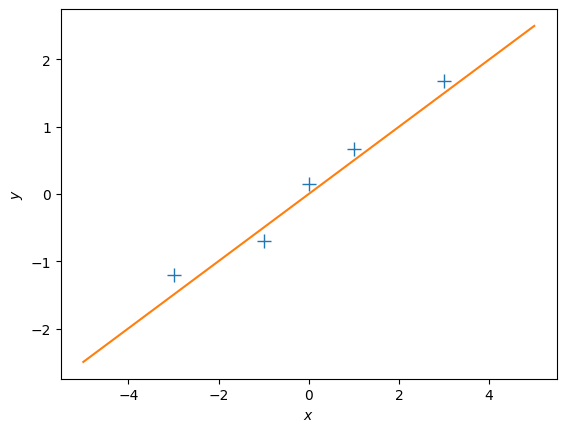

In [10]:
# define a test set
xtest = np.linspace(-5, 5, 100).reshape(-1,1) # 100 * 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(xtest, theta_ml)

# plot
plt.figure()
plt.plot(x, y, '+', markersize=10)
plt.plot(xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

Questions
1) Does the solution above look reasonable?
2) Play around with different values of theta. How do the corresponding functions change?
3) Modify the training targets <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">Y</mi>
  </mrow>
</math> and re-run your computation. What changes?

- Let us now look at a different training set, where we add 2.0 to every
-value, and compute the maximum likelihood estimate

Text(0, 0.5, '$y$')

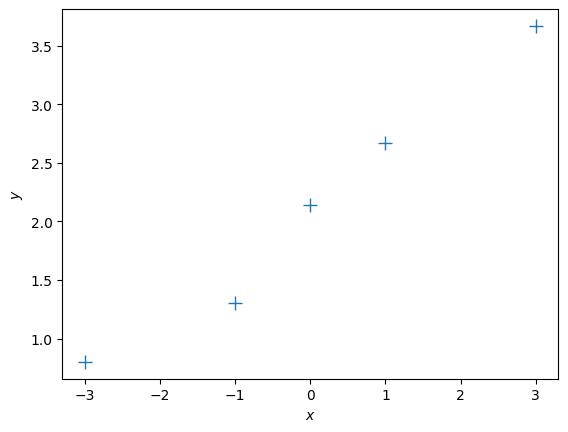

In [15]:
ynew  = y+2.0
plt.figure()
plt.plot(x, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")

[[0.499]]


Text(0, 0.5, '$y$')

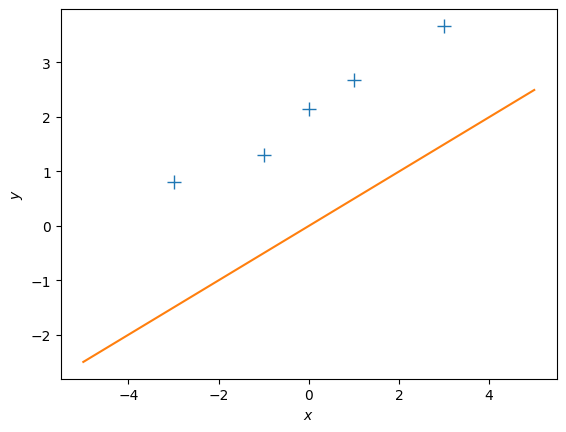

In [16]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(x, ynew)
print(theta_ml)

# define a test set
xtest = np.linspace(-5, 5, 100).reshape(-1,1)  # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimation
ml_prediction = predict_with_estimate(xtest, theta_ml)

# plot
plt.figure()
plt.plot(x, ynew, '+', markersize=10)
plt.plot(xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")